# Proyecto de Transporte Trole Quito

Los resultados del análisis exploratorio de Trole de Quito tienen la finalidad de proporcionar el número óptimo de pasajeros por cada parada, siendo un importante insumo para el proyecto de transporte en general; puesto que este se complementa con una solución IoT que realiza el conteo de personas en tiempo real en cada una de las estaciones. Para este análisis se ha utilizado la ruta C1 del Trole.

## Importar bibliotecas

In [44]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import math
import matplotlib.pyplot as plt
from IPython.display import display, HTML

from sklearn import metrics

## Cargar datos

In [6]:
#Data original
df = pd.ExcelFile("Data_Transporte.xlsx")
df1 = df.parse('DATASET')
#Data para trabajar 
data_transporte= df1

## Calidad de los Datos

In [62]:
print(data_transporte.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CODIDO RUTA          821 non-null    int64         
 1   COORDENADA X         821 non-null    float64       
 2   COORDENADA Y         821 non-null    float64       
 3   ABORDAN              821 non-null    int64         
 4   BAJAN                821 non-null    int64         
 5   PERIODO              821 non-null    object        
 6   CAPACIDAD            821 non-null    int64         
 7   FECHA                821 non-null    datetime64[ns]
 8   HORA                 821 non-null    object        
 9   SENTIDO              821 non-null    int64         
 10  CODIGO               821 non-null    object        
 11  NOMBRE ESTACION      821 non-null    object        
 12  TIPO  ESTACION       821 non-null    object        
 13  PARADAS IDA          821 non-null  

In [7]:
data_transporte.isna().sum()

CODIDO RUTA            0
COORDENADA X           0
COORDENADA Y           0
ABORDAN                0
BAJAN                  0
PERIODO                0
CAPACIDAD              0
FECHA                  0
HORA                   0
SENTIDO                0
CODIGO                 0
NOMBRE ESTACION        0
TIPO  ESTACION         0
PARADAS IDA            0
PARADAS RETORNO        0
RUTA                   0
TIEMPO DE VIAJE        0
DISTANCIA RECORRIDA    0
TIEMPO DE PARADA       0
SUMA DE TIEMPOS        0
VELOCIDAD (M/S)        0
VELOCIDAD (KM/H)       0
dtype: int64

En la data no se encuentran valores perdidos.

In [9]:
data_transporte.describe()

CODIDO RUTA   COORDENADA X  COORDENADA Y     ABORDAN       BAJAN  \
count  8.210000e+02     821.000000  8.210000e+02  821.000000  821.000000   
mean   1.253390e+07  499639.627621  9.976784e+06    3.986602    3.952497   
std    5.652282e+05    1286.064364  2.807958e+03    7.519313    4.452342   
min    1.190771e+07  497612.360249  9.972058e+06    0.000000    0.000000   
25%    1.193593e+07  498522.759794  9.974465e+06    0.000000    1.000000   
50%    1.300970e+07  499672.769178  9.976351e+06    2.000000    3.000000   
75%    1.305325e+07  500941.388524  9.979263e+06    4.000000    6.000000   
max    1.314690e+07  501608.531507  9.981911e+06   57.000000   56.000000   

       CAPACIDAD     SENTIDO  TIEMPO DE VIAJE  DISTANCIA RECORRIDA  \
count      821.0  821.000000       821.000000           821.000000   
mean       160.0    1.479903        60.712860           556.656516   
std          0.0    0.499900        35.373480           281.145278   
min        160.0    1.000000         0.000000             0.000000   
25%        160.0    1.000000        41.536615           395.000000   
50%        160.0    1.000000        58.943577           501.000000   
75%        160.0    2.000000        75.390156           759.000000   
max        160.0    2.000000       157.743097          1314.000000   

       TIEMPO DE PARADA  SUMA DE TIEMPOS  VELOCIDAD (M/S)  VELOCIDAD (KM/H)  
count        821.000000       821.000000       821.000000        821.000000  
mean          24.682095        82.793250         5.299048         19.076574  
std            9.428811        41.824960         2.080797          7.490870  
min            0.000000         0.000000         0.000000          0.000000  
25%           17.000000        65.020408         5.029273         18.105383  
50%           25.000000        82.226891         5.858885         21.091987  
75%           33.000000       105.390156         6.613341         23.808029  
max           40.000000       197.743097         7.833407         28.200266

Podriamos concluir que la capacidad usada de un autobus es de 57 personas, un 1/3 de su capacidad máxima, debido a que es el valor máximo de personas que suben o bajan y podria corresponder a paradas como el Recreo o Norte La Y. La velocidad es relativamente **baja** pues en promedio se mueven con una velocidad de 19 km/h y su velocidad máxima es de 28 km/m, este dato resulta un poco sospechoso y de estar errado podría deberse a una mala toma del dato.

Promedio de personas que abordan:  ABORDAN    3.99
dtype: float64
Promedio de personas que desembarcan:  BAJAN    3.95
dtype: float64
Promedio de distancia recorrida entre paradas:  DISTANCIA RECORRIDA    556.66
dtype: float64


      BAJAN  ABORDAN  DISTANCIA RECORRIDA
0.10    0.0      0.0                270.0
0.25    1.0      0.0                395.0
0.50    3.0      2.0                501.0
0.60    4.0      2.0                555.0
0.80    6.0      5.0                800.0
0.90    9.0      9.0                937.0


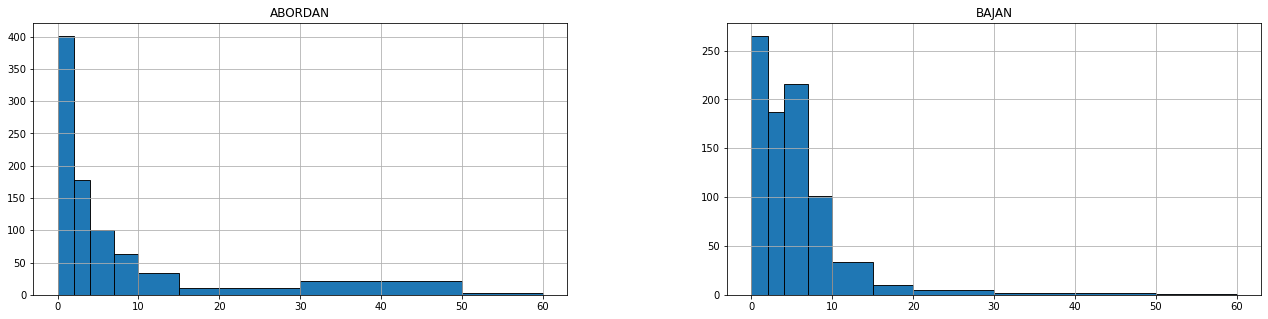

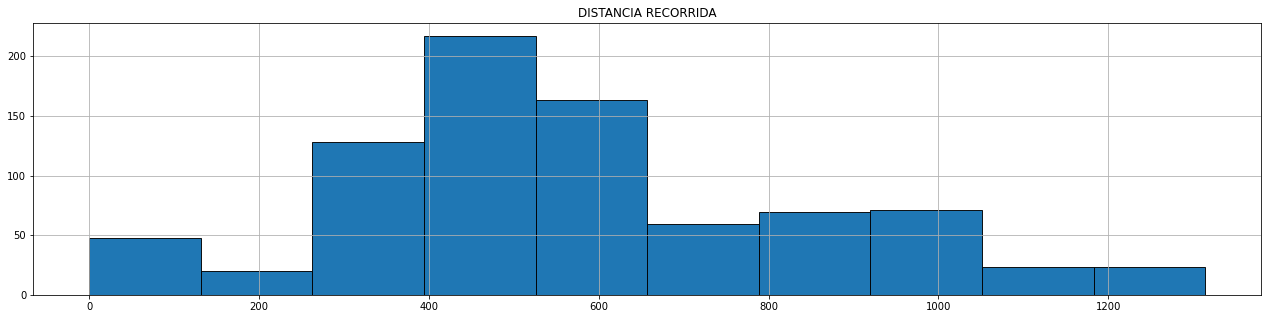

In [61]:
display(HTML('<br> <b>Promedios:</b>'))
print("Promedio de personas que abordan: ", data_transporte[['ABORDAN']].mean().round(2))
print("Promedio de personas que desembarcan: ", data_transporte[['BAJAN']].mean().round(2))
print("Promedio de distancia recorrida entre paradas: ", data_transporte[['DISTANCIA RECORRIDA']].mean().round(2))

display(HTML('<br> <b>Cuantiles:</b>'))
print( data_transporte[['BAJAN','ABORDAN','DISTANCIA RECORRIDA']].quantile([.1, .25, .5, 0.6, .8, 0.90], axis = 0) )

hist,bin_edges = np.histogram(data_transporte[['ABORDAN']])
data_transporte[['ABORDAN','BAJAN']].hist(bins=[0, 2, 4, 7,10,15,20,30,50,60], edgecolor='black', linewidth=0.9, figsize=(22,5))
data_transporte[['DISTANCIA RECORRIDA']].hist( edgecolor='black', linewidth=0.9, figsize=(22,5))
plt.show()

En el 80% de paradas el numero de personas que suben y bajan es de 6.

No se encuentran valores atípicos.

## Vista general de la base

In [3]:
data_transporte.head()

CODIDO RUTA   COORDENADA X  COORDENADA Y  ABORDAN  BAJAN PERIODO  \
0     11908357  501608.531507  9.981911e+06       15      0   Valle   
1     11908357  501371.502185  9.980968e+06        4      1   Valle   
2     11908357  501123.237691  9.979894e+06        3      0   Valle   
3     11908357  501006.413841  9.979501e+06        1      1   Valle   
4     11908357  500758.124947  9.978819e+06        7      0   Valle   

   CAPACIDAD      FECHA      HORA  SENTIDO  ... TIPO  ESTACION PARADAS IDA  \
0        160 2016-06-01  09:24:00        1  ...  BIDIRECCIONAL           0   
1        160 2016-06-01  09:24:00        1  ...            IDA           1   
2        160 2016-06-01  09:24:00        1  ...            IDA           3   
3        160 2016-06-01  09:24:00        1  ...            IDA           4   
4        160 2016-06-01  09:24:00        1  ...            IDA           6   

  PARADAS RETORNO RUTA TIEMPO DE VIAJE DISTANCIA RECORRIDA  TIEMPO DE PARADA  \
0              19   C1        0.000000                   0                21   
1       No aplica   C1      116.686675                 972                12   
2       No aplica   C1       42.376951                 353                16   
3       No aplica   C1       49.219688                 410                24   
4       No aplica   C1       36.014406                 300                12   

   SUMA DE TIEMPOS  VELOCIDAD (M/S)  VELOCIDAD (KM/H)  
0         0.000000         0.000000          0.000000  
1       128.686675         7.553230         27.191627  
2        58.376951         6.046907         21.768866  
3        73.219688         5.599587         20.158513  
4        48.014406         6.248125         22.493249  

[5 rows x 22 columns]

### Verificar nombre de las estaciones

In [4]:
tab = data_transporte.groupby(['NOMBRE ESTACION']).size()
tab

NOMBRE ESTACION
ALAMEDA                46
CHIMBACALLE            44
CUERO Y CAICEDO        45
CUMANDA                41
EL EJIDO               44
EL FLORON              32
ESTACION EL RECREO     48
ESTACION NORTE LA Y    46
ESTADIO                34
HERMANO MIGUEL         16
JEFERSON PEREZ         20
JEFFERSON PEREZ        15
LA CAROLINA            38
LA MARISCAL            29
LA RECOLETA            46
LA Y                   44
MARIANA DE JESUS       35
MONTUFAR               19
PLAZA CHICA            22
PLAZA DEL TEATRO       23
STA CLARA              46
STO DOMINGO            45
VILLAFLORA             43
dtype: int64

In [5]:
#Corregir nombre de estaciones
data_transporte.loc[data_transporte['NOMBRE ESTACION'] == 'JEFERSON PEREZ', 'NOMBRE ESTACION'] = 'JEFFERSON PEREZ'  
tab = data_transporte.groupby(['NOMBRE ESTACION']).size()
tab

NOMBRE ESTACION
ALAMEDA                46
CHIMBACALLE            44
CUERO Y CAICEDO        45
CUMANDA                41
EL EJIDO               44
EL FLORON              32
ESTACION EL RECREO     48
ESTACION NORTE LA Y    46
ESTADIO                34
HERMANO MIGUEL         16
JEFFERSON PEREZ        35
LA CAROLINA            38
LA MARISCAL            29
LA RECOLETA            46
LA Y                   44
MARIANA DE JESUS       35
MONTUFAR               19
PLAZA CHICA            22
PLAZA DEL TEATRO       23
STA CLARA              46
STO DOMINGO            45
VILLAFLORA             43
dtype: int64

## Vista de la ruta

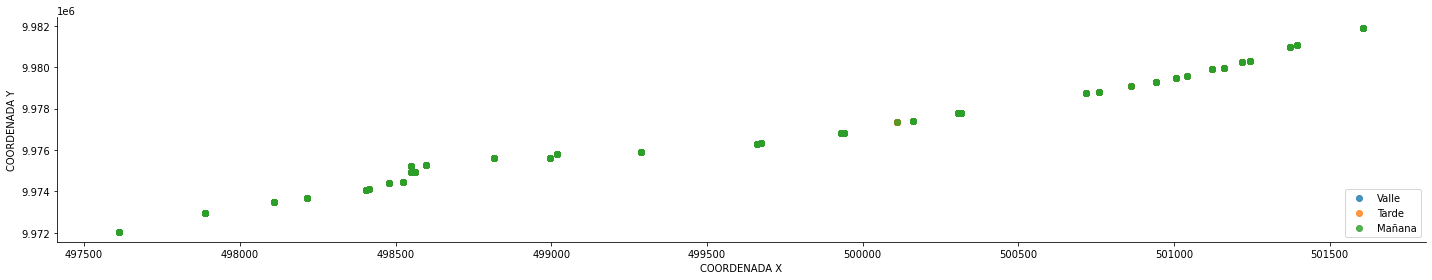

In [75]:
sns.lmplot( x="COORDENADA X", y="COORDENADA Y", data=data_transporte, fit_reg=False, hue='PERIODO', legend=False, height=4, aspect=5)

plt.legend(loc='lower right')
plt.show()


### Periodo

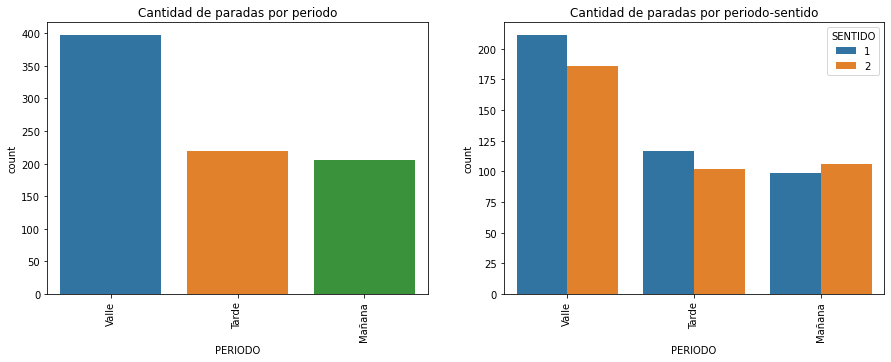

PERIODO  SENTIDO
0  Mañana      205
1   Tarde      219
2   Valle      397

In [65]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
chart1=sns.countplot(data_transporte['PERIODO'],hue='SENTIDO',data=data_transporte,ax=ax[1])
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
chart2=sns.countplot(data_transporte['PERIODO'],data=data_transporte,ax=ax[0])
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
ax[0].title.set_text("Cantidad de paradas por periodo")
ax[1].title.set_text("Cantidad de paradas por periodo-sentido")
plt.show()

data_transporte[['PERIODO', 'SENTIDO']].groupby(['PERIODO'], as_index=False).count()


- Los datos muestran que dependiendo del periodo en el que se haga el recorrido el trole cambia el número de paradas. Esto puede pasar debido a que en determinadas paradas el trole ya va a su capacidad máxima. 
- Los datos de la mañana contabilizan menos paradas, lo cual podría indicar que en este periodo viajan más personas. El periodo de la mañana corresponde desde las 5am hasta las 8am. 
- El periodo de la tarde corresponde desde las 3pm hasta las 8pm.  
- EL periodo Valle corresponde desde las 9am hasta las 2pm, en donde se registra mayor cantidad de paradas; esto podría deberse a que en ese periodo no existe una demanda tan alta de transporte como en los demás periodos.

### Cantidad de pasajeros periodo-estación

In [66]:
# Sentido 1 Norte-Sur (Ida)
sentido1= data_transporte[data_transporte['SENTIDO']==1]
sentido1=sentido1[['ABORDAN','BAJAN','NOMBRE ESTACION','PERIODO']].groupby(['NOMBRE ESTACION','PERIODO'],as_index=False). mean()
sentido1['ABORDAN'] = sentido1['ABORDAN'].apply(np.ceil)
sentido1['BAJAN'] = sentido1['BAJAN'].apply(np.ceil)

paradas= data_transporte[data_transporte['SENTIDO']==1]
paradas= paradas[["NOMBRE ESTACION","PARADAS IDA"]]
paradas=paradas.drop_duplicates(subset=['PARADAS IDA'], keep='first')

orden_sentido1 = pd.merge(left=sentido1, right=paradas, how='left', left_on=["NOMBRE ESTACION"], 
                         right_on=["NOMBRE ESTACION"])
orden_sentido1=orden_sentido1.sort_values(by=['PARADAS IDA'], inplace=False)
orden_sentido1
suma_acumulada= orden_sentido1[['ABORDAN','BAJAN','NOMBRE ESTACION','PERIODO']].groupby(['PERIODO'],
                                                                           as_index=True). cumsum()

suma_acumulada.rename(columns={'ABORDAN':'ABORDAN_ACUMULADO','BAJAN':'BAJAN_ACUMULADO'},inplace=True)
sentido1_final= pd.merge(orden_sentido1, suma_acumulada, left_index=True, right_index=True)
sentido1_final['OCUPACION_PASAJEROS']=  sentido1_final['ABORDAN_ACUMULADO'] -sentido1_final['BAJAN_ACUMULADO']



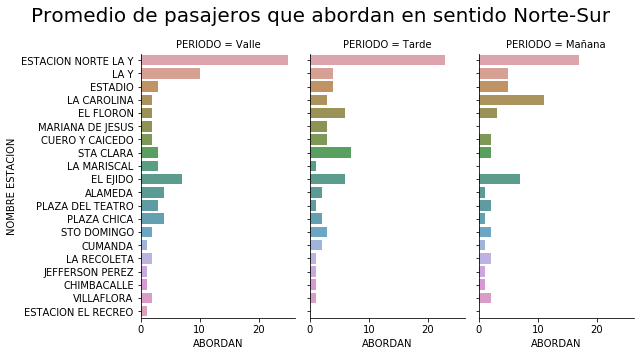

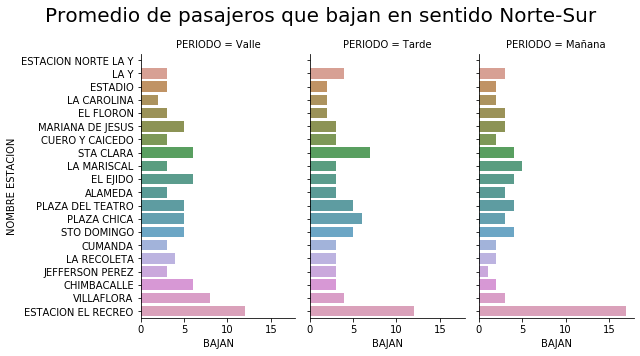

In [8]:
#Graficar Sentido 1 Norte-Sur (Ida)
a = sns.catplot(x="ABORDAN", y="NOMBRE ESTACION", col="PERIODO",
                data=sentido1_final, saturation=.5, kind="bar", ci=None, aspect=.6)
plt.subplots_adjust(top=0.85)

b = sns.catplot(x="BAJAN", y="NOMBRE ESTACION", col="PERIODO",
                data=sentido1_final, saturation=.5, kind="bar", ci=None, aspect=.6)
plt.subplots_adjust(top=0.85)

a.fig.suptitle('Promedio de pasajeros que abordan en sentido Norte-Sur',fontsize = 20) 
b.fig.suptitle('Promedio de pasajeros que bajan en sentido Norte-Sur',fontsize = 20) 
plt.show()

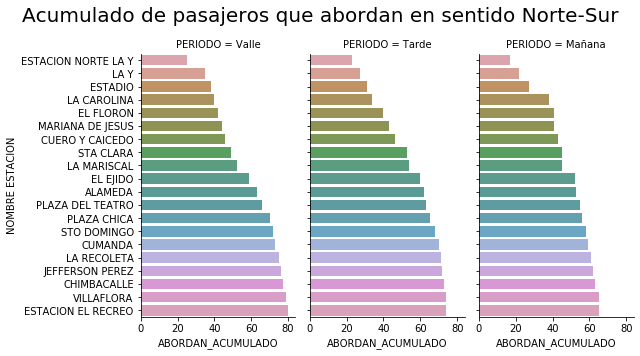

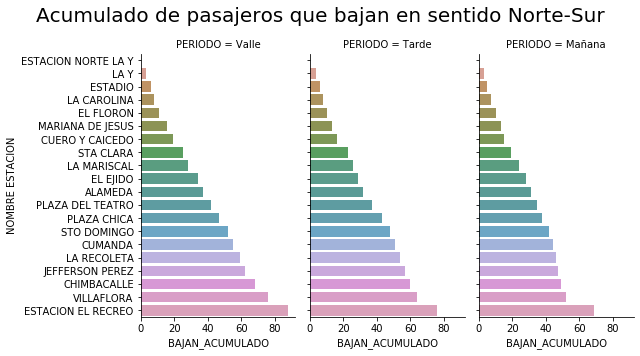

In [64]:
#Graficar Sentido 1 Norte-Sur (Ida) acumulado
a = sns.catplot(x="ABORDAN_ACUMULADO", y="NOMBRE ESTACION", col="PERIODO",
                data=sentido1_final, saturation=.5, kind="bar", ci=None, aspect=.6)
plt.subplots_adjust(top=0.85)

b = sns.catplot(x="BAJAN_ACUMULADO", y="NOMBRE ESTACION", col="PERIODO",
                data=sentido1_final, saturation=.5, kind="bar", ci=None, aspect=.6)
plt.subplots_adjust(top=0.85)

a.fig.suptitle('Acumulado de pasajeros que abordan en sentido Norte-Sur',fontsize = 20) 
b.fig.suptitle('Acumulado de pasajeros que bajan en sentido Norte-Sur',fontsize = 20) 
plt.show()

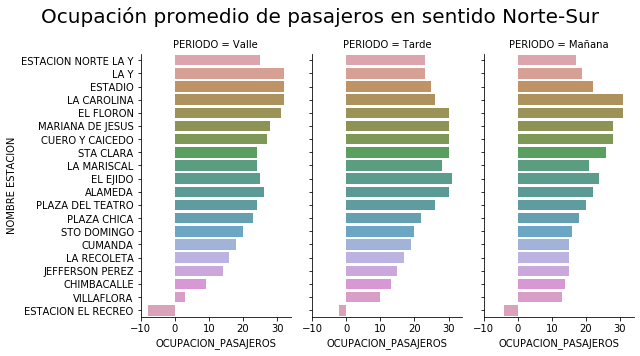

In [19]:
#Graficar Ocupacion Sentido 1 Norte-Sur (Ida) 
a = sns.catplot(x="OCUPACION_PASAJEROS", y="NOMBRE ESTACION", col="PERIODO",
                data=sentido1_final, saturation=.5, kind="bar", ci=None, aspect=.6)
plt.subplots_adjust(top=0.85)
a.fig.suptitle('Ocupación promedio de pasajeros en sentido Norte-Sur',fontsize = 20) 
plt.show()

In [15]:
# Sentido 2 Norte-Sur (Ida)
sentido2= data_transporte[data_transporte['SENTIDO']==2]
sentido2=sentido2[['ABORDAN','BAJAN','NOMBRE ESTACION','PERIODO']].groupby(['NOMBRE ESTACION','PERIODO'],as_index=False). mean()
sentido2['ABORDAN'] = sentido2['ABORDAN'].apply(np.ceil)
sentido2['BAJAN'] = sentido2['BAJAN'].apply(np.ceil)

paradas_s2= data_transporte[data_transporte['SENTIDO']==2]
paradas_s2= paradas_s2[["NOMBRE ESTACION","PARADAS RETORNO"]]
paradas_s2=paradas_s2.drop_duplicates(subset=['PARADAS RETORNO'], keep='first')
paradas_s2
orden_sentido2 = pd.merge(left=sentido2, right=paradas_s2, how='left', left_on=["NOMBRE ESTACION"], 
                         right_on=["NOMBRE ESTACION"])
orden_sentido2=orden_sentido2.sort_values(by=['PARADAS RETORNO'], inplace=False)
orden_sentido2
suma_acumulada_s2= orden_sentido2[['ABORDAN','BAJAN','NOMBRE ESTACION','PERIODO']].groupby(['PERIODO'],
                                                                           as_index=True). cumsum()

suma_acumulada_s2.rename(columns={'ABORDAN':'ABORDAN_ACUMULADO','BAJAN':'BAJAN_ACUMULADO'},inplace=True)
sentido2_final= pd.merge(orden_sentido2, suma_acumulada_s2, left_index=True, right_index=True)
sentido2_final['OCUPACION_PASAJEROS']=  sentido2_final['ABORDAN_ACUMULADO'] -sentido2_final['BAJAN_ACUMULADO']

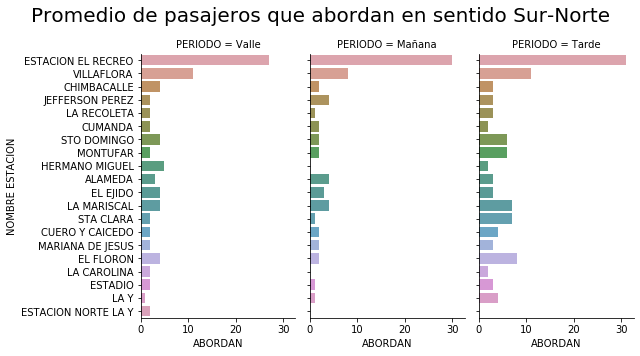

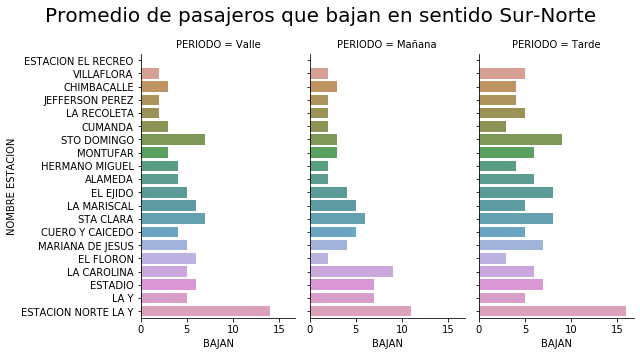

In [16]:
#Graficar Sentido 2 Sur-Norte (Vuelta)
a = sns.catplot(x="ABORDAN", y="NOMBRE ESTACION", col="PERIODO",
                data=sentido2_final, saturation=.5, kind="bar", ci=None, aspect=.6)
plt.subplots_adjust(top=0.85)

b = sns.catplot(x="BAJAN", y="NOMBRE ESTACION", col="PERIODO",
                data=sentido2_final, saturation=.5, kind="bar", ci=None, aspect=.6)
plt.subplots_adjust(top=0.85)

a.fig.suptitle('Promedio de pasajeros que abordan en sentido Sur-Norte',fontsize = 20) 
b.fig.suptitle('Promedio de pasajeros que bajan en sentido Sur-Norte',fontsize = 20) 
plt.show()

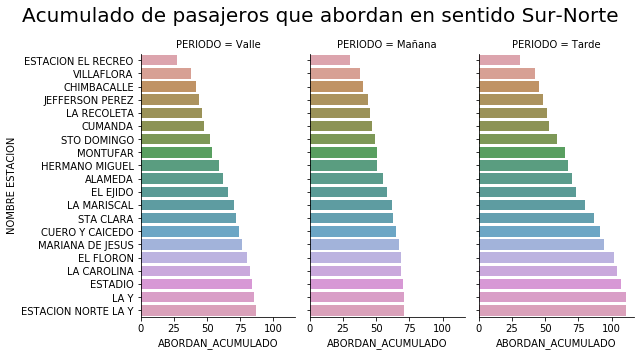

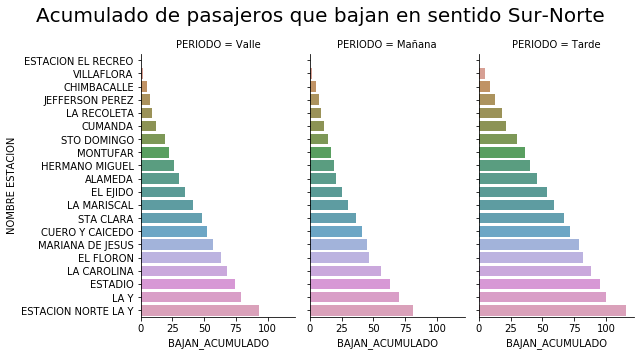

In [17]:
#Graficar Sentido 2 Sur-Norte (Vuelta)
a = sns.catplot(x="ABORDAN_ACUMULADO", y="NOMBRE ESTACION", col="PERIODO",
                data=sentido2_final, saturation=.5, kind="bar", ci=None, aspect=.6)
plt.subplots_adjust(top=0.85)

b = sns.catplot(x="BAJAN_ACUMULADO", y="NOMBRE ESTACION", col="PERIODO",
                data=sentido2_final, saturation=.5, kind="bar", ci=None, aspect=.6)
plt.subplots_adjust(top=0.85)

a.fig.suptitle('Acumulado de pasajeros que abordan en sentido Sur-Norte',fontsize = 20) 
b.fig.suptitle('Acumulado de pasajeros que bajan en sentido Sur-Norte',fontsize = 20) 
plt.show()

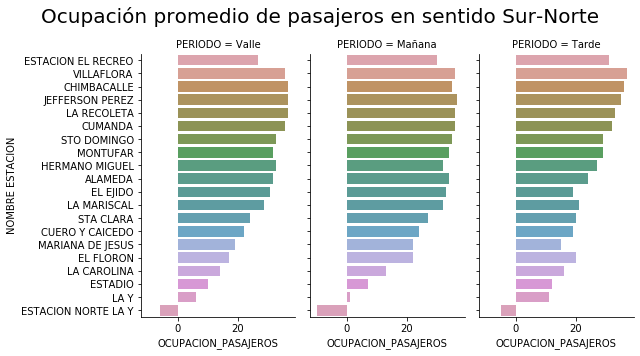

In [20]:
#Graficar Ocupacion Sentido 2 Sur-Norte (Vuelta)
a = sns.catplot(x="OCUPACION_PASAJEROS", y="NOMBRE ESTACION", col="PERIODO",
                data=sentido2_final, saturation=.5, kind="bar", ci=None, aspect=.6)
plt.subplots_adjust(top=0.85)
a.fig.suptitle('Ocupación promedio de pasajeros en sentido Sur-Norte',fontsize = 20) 
plt.show()

# Créditos

MSc. Augusto Steves Mendoza Calero
- Linkedin: https://www.linkedin.com/in/augusmendoza/
- Correo: augusto-mendoza@hotmail.com

Mat. Darwin Hernán Cubi Velásquez
- Linkedin: https://www.linkedin.com/in/darwin-c-v/
- Correo: darwin.cubi@gmail.com 



# importar librerias¶

In [ ]:
import cv2
import imutils

# Importar el archivo que nos permite el reconocimiento de caras

In [ ]:
faceCascade = cv2.CascadeClassifier("Resources/haarcascade_frontalface_default.xml")
cap = cv2.VideoCapture("Resources/test4.mp4")

# Ciclo infinito para anilizar imagen por imagen el video

In [ ]:
while True:
    count = 0
    success, img = cap.read()
    img = imutils.resize(img,width=720,height=480)
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(imgGray)
    for(x, y, w, h) in faces:
        count += 1
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        font = cv2.FONT_HERSHEY_SIMPLEX
        org = (50,50)
        fontScale = 100
        color = (0,0,0)
        thickness = 2
        imgGray = cv2.putText(img,'OpenCv',org,font,fontScale,color,thickness,cv2.LINE_AA)
    cv2.imshow("Video", img)
    print(count)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

In [ ]:
Rostros detectados